<a href="https://colab.research.google.com/github/BigyanBhatta/Deep-Learning-Improvement/blob/main/weight_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

from sklearn.datasets import make_moons

In [ ]:
X , y = make_moons(n_samples = 100, noise = 0.35, random_state = 42)


In [ ]:
model = Sequential()
model.add(Dense(10, activation = 'sigmoid', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
len(model.get_weights())

4

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
history = model.fit(X, y, epochs = 200, validation_split = 0.2, verbose = False)

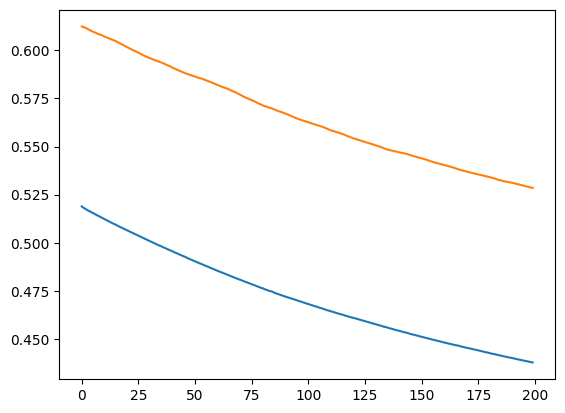

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

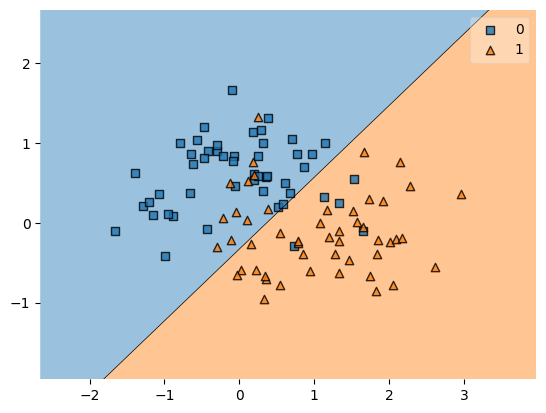

In [ ]:
plot_decision_regions(X, y, clf = model)

In [ ]:
model.get_weights()

[array([[-1.3201015, -1.3201015, -1.3201015, -1.3201015, -1.3201015,
         -1.3201015, -1.3201015, -1.3201015, -1.3201015, -1.3201015],
        [ 1.4704067,  1.4704067,  1.4704067,  1.4704067,  1.4704067,
          1.4704067,  1.4704067,  1.4704067,  1.4704067,  1.4704067]],
       dtype=float32),
 array([-0.70038885, -0.70038885, -0.70038885, -0.70038885, -0.70038885,
        -0.70038885, -0.70038885, -0.70038885, -0.70038885, -0.70038885],
       dtype=float32),
 array([[-0.4380006],
        [-0.4380006],
        [-0.4380006],
        [-0.4380006],
        [-0.4380006],
        [-0.4380006],
        [-0.4380006],
        [-0.4380006],
        [-0.4380006],
        [-0.4380006]], dtype=float32),
 array([1.0252784], dtype=float32)]

In [ ]:
model1 = Sequential()
model1.add(Dense(10, activation = 'relu', input_dim = 2))
model1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
initial_weights_new = model1.get_weights()

initial_weights_new[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights_new[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights_new[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights_new[3] = np.ones(model.get_weights()[3].shape)*0.5

model1.set_weights(initial_weights_new)

In [ ]:
model1.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
history = model1.fit(X, y, epochs = 200, validation_split = 0.2, verbose = False)

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

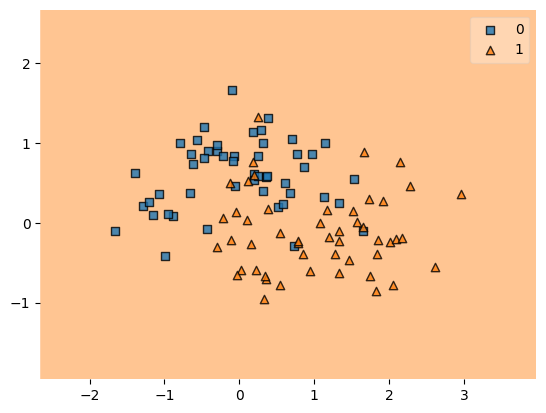

In [ ]:
plot_decision_regions(X, y, clf = model1)

In [ ]:
model1.get_weights()

[array([[-1.2836905 , -0.25972643,  0.16264662,  0.48997653,  0.93568563,
          0.16202816, -0.20612808, -0.16895488,  0.01817996, -1.154326  ],
        [ 0.24421863,  1.0977023 ,  0.4316666 ,  0.17479947, -1.4399185 ,
         -1.2002978 ,  0.43283987,  0.9878006 , -1.2050747 ,  0.2623737 ]],
       dtype=float32),
 array([ 0.00473878,  0.38470575, -0.32045072, -0.20225279,  0.32300046,
         0.33269694, -0.16947381,  0.33321115,  0.3601166 , -0.05176887],
       dtype=float32),
 array([[-0.9561865 ],
        [-0.5561071 ],
        [ 0.626535  ],
        [ 0.42879125],
        [ 0.7517146 ],
        [ 1.2265007 ],
        [ 0.43705967],
        [-0.6822101 ],
        [ 0.8058258 ],
        [-1.2090894 ]], dtype=float32),
 array([-0.14254245], dtype=float32)]

15625/15625 [==============================] - 26s 2ms/step


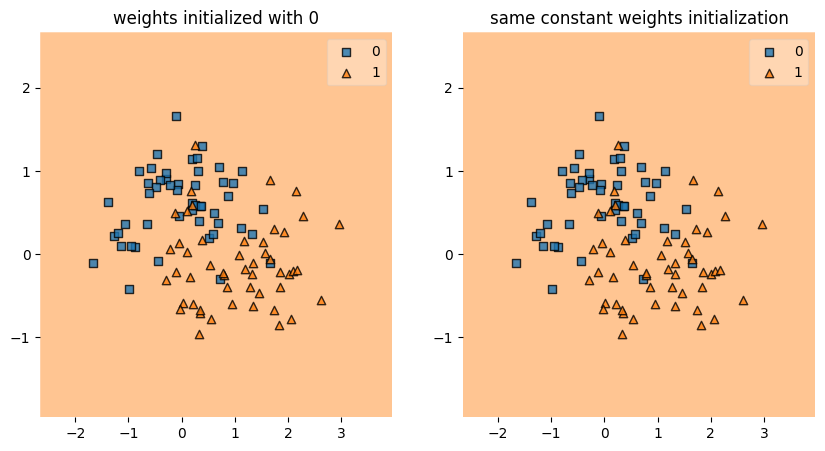

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.title('weights initialized with 0')
plot_decision_regions(X, y, clf = model)

plt.subplot(122)
plt.title('same constant weights initialization')
plot_decision_regions(X, y, clf = model1)

plt.show()

In [ ]:
# both weight initialization technique has failed to capture the pattern in the data badly.